<a href="https://colab.research.google.com/github/Akasonal/AffairPredictionDeployment/blob/master/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import re

In [193]:
data=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv')
data.head()

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [194]:
data=data.rename(columns={'twitts':'tweets'})

In [195]:
data.head()

,tweets,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [196]:
data['sentiment'].value_counts()

1    2000
0    2000
Name: sentiment, dtype: int64

## Word Counts and Char Counts
It will give us idea about word and character counts


In [197]:
word='Bharati Vidyapeeth university'
print(len(word.split()))

3


In [198]:
def word_count(x):
  return len(str(x).split())

In [199]:
data['word_count']=data['tweets'].apply(word_count)

In [200]:
data.head()

,tweets,sentiment,word_count
0,is bored and wants to watch a movie any sugge...,0,10
1,back in miami. waiting to unboard ship,0,7
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12
3,ughhh i am so tired blahhhhhhhhh,0,6
4,@mandagoforth me bad! It's funny though. Zacha...,0,26


In [201]:
char='Akhil Anand'
char_new=char.split()
char_out=''.join(char_new)
print(len(char_out))

10


In [202]:
def char_count(x):
  x_list=x.split()
  x_str=''.join(x_list)
  char_len=len(str(x_str))
  return char_len

In [203]:
data['char_count']=data['tweets'].apply(char_count)

In [204]:
data.head()

,tweets,sentiment,word_count,char_count
0,is bored and wants to watch a movie any sugge...,0,10,43
1,back in miami. waiting to unboard ship,0,7,32
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54
3,ughhh i am so tired blahhhhhhhhh,0,6,27
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116


In [205]:
data[data['word_count']==2]

,tweets,sentiment,word_count,char_count
55,@haemoglobin_ Why?,0,2,17
198,is sad,0,2,5
204,@sross4 why?,0,2,11
224,at work,0,2,6
270,@ZenjiHealth Nice,0,2,16
...,...,...,...,...
3552,@AmbersAccents hellooooo,1,2,23
3612,playing facebook,1,2,15
3712,eating chocolates,1,2,16
3743,Pip-pip-doodly-do laddy,1,2,22


## Average word count

In [206]:
def avg_word_count(x):
  avg_count=char_count(x)/word_count(x)
  return avg_count

In [207]:
data['avg_word_count']=data['tweets'].apply(avg_word_count)

In [208]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000
1,back in miami. waiting to unboard ship,0,7,32,4.571429
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538


In [209]:
stop_words=set(stopwords)
print(stop_words)

{'wherever', 'top', 'front', 'five', 'thereby', 'they', 'was', 'thru', 'out', 'this', 'next', 'off', 'side', 'eleven', 'besides', 'former', '’m', 'nobody', 'everywhere', 'either', 'hereupon', 'moreover', 'twenty', 'we', 'few', 'fifty', 'without', 'noone', 'yet', 'namely', 'since', '‘ll', 'would', 'own', 'four', 'though', 'cannot', 'any', 'take', 'mostly', 'very', 'becoming', 'than', 'your', 'of', 'alone', 'had', 'latterly', 'us', 'serious', 'under', 'regarding', 'who', 'between', 'sometimes', 'whole', 'say', 'others', 'almost', 'several', 'everything', 'somewhere', '‘d', 'whatever', 'which', 'once', 'an', 'both', 'could', 'more', 'less', '’re', 'beyond', 'me', 'that', 'show', 'being', 'except', "'s", 'thereafter', 'see', 'anyway', 'two', 'yourselves', 'thus', 'and', 'rather', 'here', 'elsewhere', 'further', 'has', 'below', 'most', 're', 'another', 'him', 'during', 'her', 'can', 'much', 'someone', 'what', 'he', 'whose', 'whereas', '’d', 'whence', 'himself', 'does', 'whereby', 'there', '

In [210]:
intro='This is akhil anand'
stop_words=[word for word in stop_words if word in intro.split()]

In [211]:
stop_words

['is']

In [212]:
def stop_word_count(x):
  x_stop_word=[word for word in stopwords if word in str(x).split()]
  return len(x_stop_word)

In [213]:
data['stop_word_count']=data['tweets'].apply(stop_word_count)

In [214]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,12


In [215]:
new_var='# Akhil Anand @akhilanand'
list_var=new_var.split()
list_var

['#', 'Akhil', 'Anand', '@akhilanand']

In [216]:
print(len([i for i in list_var if i.startswith('#')]))


1


In [217]:
def hashtag_count(x):
  x_list=str(x).split()
  x_word=[word for word in x_list if word.startswith('#')]
  return len(x_word)

In [218]:
data['hashtag_count']=data['tweets'].apply(hashtag_count)

In [219]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,12,0


In [220]:
def mention_count(x):
  x_list=str(x).split()
  x_word=[word for word in x_list if word.startswith('@')]
  return len(x_word)

In [221]:
data['mention_count']=data['tweets'].apply(mention_count)

In [222]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,12,0,2


## Numeric digit count

In [223]:
a='one 1 two 2 three 3 four 4'
print([i for i in a.split() if i.isdigit()])

['1', '2', '3', '4']


In [224]:
def numeric_digit_count(x):
  x_list=x.split()
  x_digit=[word for word in x_list if word.isdigit()]
  return len(x_digit)

In [225]:
data['numeric_digit_count']=data['tweets'].apply(numeric_digit_count)

In [226]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,12,0,2,0


## Upper case count


In [227]:
b='I Akhil Anand one two three four'
print([i for i in b.split() if i.isupper()])

['I']


In [228]:
def upper_case_count(x):
  x_list=str(x).split()
  x_word=[word for word in x_list if word.isupper()]
  return len(x_word)

In [229]:
data['upper_case_count']=data['tweets'].apply(upper_case_count)

In [230]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,12,0,2,0,0


#### converting all the text into lower case

In [231]:
def lower_case_conversion(x):
  return x.lower()

In [232]:
data['tweets']=data['tweets'].apply(lower_case_conversion)

In [233]:
contraction={
    "€" : "euro",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    "ain't": "am not",
	"aren't": "are not",
	"can't": "cannot",
	"can't've": "cannot have",
	"'cause": "because",
	"could've": "could have",
	"couldn't": "could not",
	"couldn't've": "could not have",
	"didn't": "did not",
	"doesn't": "does not",
	"don't": "do not",
	"hadn't": "had not",
	"hadn't've": "had not have",
	"hasn't": "has not",
	"haven't": "have not",
	"he'd": "he would",
	"he'd've": "he would have",
	"he'll": "he will",
	"he'll've": "he will have",
	"he's": "he is",
	"how'd": "how did",
	"how'd'y": "how do you",
	"how'll": "how will",
	"how's": "how does",
	"i'd": "i would",
	"i'd've": "i would have",
	"i'll": "i will",
	"i'll've": "i will have",
	"i'm": "i am",
	"i've": "i have",
	"isn't": "is not",
	"it'd": "it would",
	"it'd've": "it would have",
	"it'll": "it will",
	"it'll've": "it will have",
	"it's": "it is",
	"let's": "let us",
	"ma'am": "madam",
	"mayn't": "may not",
	"might've": "might have",
	"mightn't": "might not",
	"mightn't've": "might not have",
	"must've": "must have",
	"mustn't": "must not",
	"mustn't've": "must not have",
	"needn't": "need not",
	"needn't've": "need not have",
	"o'clock": "of the clock",
	"oughtn't": "ought not",
	"oughtn't've": "ought not have",
	"shan't": "shall not",
	"sha'n't": "shall not",
	"shan't've": "shall not have",
	"she'd": "she would",
	"she'd've": "she would have",
	"she'll": "she will",
	"she'll've": "she will have",
	"she's": "she is",
	"should've": "should have",
	"shouldn't": "should not",
	"shouldn't've": "should not have",
	"so've": "so have",
	"so's": "so is",
	"that'd": "that would",
	"that'd've": "that would have",
	"that's": "that is",
	"there'd": "there would",
	"there'd've": "there would have",
	"there's": "there is",
	"they'd": "they would",
	"they'd've": "they would have",
	"they'll": "they will",
	"they'll've": "they will have",
	"they're": "they are",
	"they've": "they have",
	"to've": "to have",
	"wasn't": "was not",
	"ur": "your",
	"n": "and",
	"won't": "would not",
	"dis": "this",
	"brng": "bring"
}



In [234]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contraction:
        value=contraction[key]
        x=x.replace(key,value)
        return x
  else:
    return x
      



In [235]:
data['cont_to_exp']=data['tweets'].apply(cont_to_exp)

In [236]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count,cont_to_exp
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0,is bored and wants to watch a movie any sugge...
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,back in miami. waiting to unboard ship
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1,"@misskpey awwww dnt dis brng bak memoriessss, ..."
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,ughhh i am so tired blahhhhhhhhh
4,@mandagoforth me bad! it's funny though. zacha...,0,26,116,4.461538,12,0,2,0,0,@mandagoforth me bad! it's funny though. zacha...


## count and remove the 

In [237]:
x="akhilanandkspa@gmail.com"

In [238]:
def emails(x):
  return re.findall(r"([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-])",x)

In [239]:
data['emails']=data['tweets'].apply(emails)

In [240]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count,cont_to_exp,emails
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0,is bored and wants to watch a movie any sugge...,[]
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,back in miami. waiting to unboard ship,[]
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1,"@misskpey awwww dnt dis brng bak memoriessss, ...",[]
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,ughhh i am so tired blahhhhhhhhh,[]
4,@mandagoforth me bad! it's funny though. zacha...,0,26,116,4.461538,12,0,2,0,0,@mandagoforth me bad! it's funny though. zacha...,[]


In [241]:
data['email_count']=data['emails'].apply(lambda x:len(x))

In [242]:
data[data['email_count']>0]

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count,cont_to_exp,emails,email_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,@securerecs arghh me please markbradbury_16@h...,[markbradbury_16@hotmail.c],1


## email removal from dataset

In [243]:
def email_removal(x):
  return re.sub(r"([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-])","",x)

In [244]:
data['tweets']=data['tweets'].apply(email_removal)

In [245]:
data['tweets'][3713]

'@securerecs arghh me please  om'

In [246]:
def url_finding(x):
  return re.findall(r'(http|ftp|https|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)

In [247]:
data['url_finding']=data['tweets'].apply(url_finding)

In [248]:
data['url_count']=data['url_finding'].apply(lambda x:len(x))

In [249]:
data[data['url_count']>0]

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count,cont_to_exp,emails,email_count,url_finding,url_count
16,@brianquest i made 1 fo u 2: http://bit.ly/eid...,0,19,81,4.263158,3,0,1,1,3,@brianquest i made 1 fo u 2: http://bit.ly/eid...,[],0,"[(http, bit.ly, /eid8a)]",1
98,heading to work http://twitpic.com/4eojz,0,4,37,9.250000,1,0,0,0,0,heading to work http://twitpic.com/4eojz,[],0,"[(http, twitpic.com, /4eojz)]",1
99,@blondeblogger http://twitpic.com/4w8hk - i'm ...,0,10,62,6.200000,3,0,1,0,0,@blondeblogger http://twitpic.com/4w8hk - i'm ...,[],0,"[(http, twitpic.com, /4w8hk)]",1
144,i miss you â« http://blip.fm/~8lc2f,0,5,32,6.400000,1,0,0,0,1,i miss you â« http://blip.fm/~8lc2f,[],0,"[(http, blip.fm, /~8lc2f)]",1
183,photo: miss germany http://tumblr.com/xf825f012,0,4,44,11.000000,0,0,0,0,0,photo: miss germany http://tumblr.com/xf825f012,[],0,"[(http, tumblr.com, /xf825f012)]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; ...,1,20,118,5.900000,4,0,0,0,1,new staark video of &quot;sweet release&quot; ...,[],0,"[(http, staark.net, /video.php)]",1
3826,http://tinyurl.com/kwmynq helmet - unsung to s...,1,9,76,8.444444,2,0,0,0,0,http://tinyurl.com/kwmynq helmet - unsung to s...,[],0,"[(http, tinyurl.com, /kwmynq), (http, plurk.co...",2
3837,@r0ckergirl14 wow sweet again!! http://twitpi...,1,5,52,10.400000,0,0,1,0,0,@r0ckergirl14 wow sweet again!! http://twitpi...,[],0,"[(http, twitpic.com, /69b67)]",1
3958,someone has been creative with my #deskmess wh...,1,13,91,7.000000,6,1,1,0,0,someone has been creative with my #deskmess wh...,[],0,"[(http, twitpic.com, /7jgf1)]",1


In [250]:
def remove_url(x):
  return re.sub(r'(http|ftp|https|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x)

In [251]:
data['tweets']=data['tweets'].apply(remove_url)

## remove retweets from the tweets

In [252]:
a="rt @akhil what's up"
re.sub(r"\brt\b",'',a)

" @akhil what's up"

In [253]:
def retweet_removal(x):
  return re.sub("\brt\b","",x)

In [254]:
data['tweets']=data['tweets'].apply(retweet_removal)

## removing special character

In [255]:
def remove_spec_char(x):
  return re.sub(r"[^\w ]"," ",x)

In [256]:
remove_spec_char("@akhil anand how are you ?????")

' akhil anand how are you      '

In [257]:
data['tweets']=data['tweets'].apply(remove_spec_char)

In [258]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count,cont_to_exp,emails,email_count,url_finding,url_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0,is bored and wants to watch a movie any sugge...,[],0,[],0
1,back in miami waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,back in miami. waiting to unboard ship,[],0,[],0
2,misskpey awwww dnt dis brng bak memoriessss ...,0,12,54,4.500000,0,0,1,0,1,"@misskpey awwww dnt dis brng bak memoriessss, ...",[],0,[],0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,ughhh i am so tired blahhhhhhhhh,[],0,[],0
4,mandagoforth me bad it s funny though zacha...,0,26,116,4.461538,12,0,2,0,0,@mandagoforth me bad! it's funny though. zacha...,[],0,[],0


## remove multiple spaces

In [259]:
a="akhil    anand     kspa"

In [260]:
a=a.split()
a=' '.join(a)

In [261]:
a

'akhil anand kspa'

In [262]:
def remove_mul_space(x):
  x_list=x.split()
  x_str=" ".join(x_list)
  return x_str

In [263]:
data['tweets']=data['tweets'].apply(remove_mul_space)

In [264]:
a1=""" akhl anand kspa
      <html></h1"""


In [265]:
from bs4 import BeautifulSoup as bs

In [266]:
bs(a1,'lxml').get_text()

'akhl anand kspa\n      '

In [267]:
def remove_html_tag(x):
  return bs(x,'lxml').get_text()

In [268]:
data['tweets']=data['tweets'].apply(remove_html_tag)

In [269]:
data.head(2)

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count,cont_to_exp,emails,email_count,url_finding,url_count
0,is bored and wants to watch a movie any sugges...,0,10,43,4.300000,5,0,0,0,0,is bored and wants to watch a movie any sugge...,[],0,[],0
1,back in miami waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,back in miami. waiting to unboard ship,[],0,[],0


# remove accented character

In [270]:
import unicodedata

In [271]:
def remove_ac_char(x):
  return unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')

In [272]:
data['tweets']=data['tweets'].apply(remove_ac_char)

## stop word removal

In [273]:
a2="This is not your job to don't interfere"

In [274]:
" ".join([word for word in a2.split() if word not in stopwords])

"This job don't interfere"

In [295]:
def remove_stop_words(x):
   x=" ".join([word for word in x.split() if word not in stopwords ])
   return x

In [276]:
data['tweets']=data["tweets"].apply(remove_stop_words)

In [277]:
data['tweets'][2]

'misskpey awwww dnt dis brng bak memoriessss thnk m sad lol'

# converting string into base root form

In [278]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [279]:
nlp=spacy.load('en_core_web_sm')

In [280]:
def base_root_form(x):
  x=str(x)
  x_list=[]
  doc=nlp(x)
  for token in doc:
    lemmatized=token.lemma_
    if lemmatized=='-PRON-' or lemmatized=='be':
      lemmatized=token.text
    x_list.append(lemmatized)
  return ' '.join(x_list)


In [281]:
base_root_form('This chocolates is gooing to be lemmatized and cooling as well cooled')

'this chocolate is gooe to be lemmatized and cool as well cool'

In [282]:
data['tweets']=data['tweets'].apply(base_root_form)

In [283]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count,cont_to_exp,emails,email_count,url_finding,url_count
0,bored want watch movie suggestion,0,10,43,4.300000,5,0,0,0,0,is bored and wants to watch a movie any sugge...,[],0,[],0
1,miami wait unboard ship,0,7,32,4.571429,3,0,0,0,0,back in miami. waiting to unboard ship,[],0,[],0
2,misskpey awwww dnt dis brng bak memoriessss th...,0,12,54,4.500000,0,0,1,0,1,"@misskpey awwww dnt dis brng bak memoriessss, ...",[],0,[],0
3,ughhh tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,ughhh i am so tired blahhhhhhhhh,[],0,[],0
4,mandagoforth bad s funny zachary quinto amp re...,0,26,116,4.461538,12,0,2,0,0,@mandagoforth me bad! it's funny though. zacha...,[],0,[],0


## common words removal and rare word removal from data

In [284]:
data['tweets']

0                       bored want watch movie suggestion
1                                 miami wait unboard ship
2       misskpey awwww dnt dis brng bak memoriessss th...
3                                ughhh tired blahhhhhhhhh
4       mandagoforth bad s funny zachary quinto amp re...
                              ...                        
3995                                             graduate
3996                                      templating work
3997                                 mommy bring starbuck
3998                        omarepps watch house run love
3999               thank try smile will 18th special hope
Name: tweets, Length: 4000, dtype: object

In [285]:
#converting all those word into text so that we can get most common word count out of them
x=' '.join(data['tweets'])

In [286]:
x_split=x.split()
x_split

['bored',
 'want',
 'watch',
 'movie',
 'suggestion',
 'miami',
 'wait',
 'unboard',
 'ship',
 'misskpey',
 'awwww',
 'dnt',
 'dis',
 'brng',
 'bak',
 'memoriessss',
 'thnk',
 'm',
 'sad',
 'lol',
 'ughhh',
 'tired',
 'blahhhhhhhhh',
 'mandagoforth',
 'bad',
 's',
 'funny',
 'zachary',
 'quinto',
 'amp',
 'reply',
 'symbol',
 'brr',
 'm',
 'cold',
 'moment',
 'assignment',
 'huntington',
 's',
 'disease',
 'depressing',
 'kevinmarquis',
 'haha',
 'yep',
 'need',
 'sleep',
 'feel',
 'like',
 'crap',
 'lol',
 'can',
 'not',
 'sleep',
 's',
 'away',
 'god',
 'm',
 'pathetic',
 'eat',
 'ice',
 'cream',
 'try',
 'peterfacinelli',
 's',
 'follower',
 'numbre',
 'raise',
 'work',
 'sadly',
 'phatty84',
 'hella',
 'bore',
 'work',
 'lol',
 'food',
 'poisoning',
 'blowssss',
 'stacig',
 'send',
 'home',
 'good',
 'guy',
 'm',
 'shika',
 'yeah',
 'try',
 'recover',
 'guess',
 'time',
 'retire',
 'hardware',
 't',
 'fall',
 'asleep',
 'padre',
 'come',
 '6',
 '0',
 'amp',
 'lose',
 'breaking',
 '

In [287]:
freq_occuring_words=pd.Series(x_split).value_counts()

In [288]:
top20=freq_occuring_words[:20]
top20

s        522
m        494
t        479
go       280
day      273
get      245
good     241
work     205
love     205
like     200
today    191
quot     163
lol      159
not      159
time     157
u        156
amp      152
think    146
miss     144
want     143
dtype: int64

In [289]:
data['tweets']=data['tweets'].apply(lambda x:' '.join([text for text in x.split() if text not in top20]))

In [290]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count,cont_to_exp,emails,email_count,url_finding,url_count
0,bored watch movie suggestion,0,10,43,4.300000,5,0,0,0,0,is bored and wants to watch a movie any sugge...,[],0,[],0
1,miami wait unboard ship,0,7,32,4.571429,3,0,0,0,0,back in miami. waiting to unboard ship,[],0,[],0
2,misskpey awwww dnt dis brng bak memoriessss th...,0,12,54,4.500000,0,0,1,0,1,"@misskpey awwww dnt dis brng bak memoriessss, ...",[],0,[],0
3,ughhh tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,ughhh i am so tired blahhhhhhhhh,[],0,[],0
4,mandagoforth bad funny zachary quinto reply sy...,0,26,116,4.461538,12,0,2,0,0,@mandagoforth me bad! it's funny though. zacha...,[],0,[],0


In [291]:
bottom20=freq_occuring_words[-20:]

In [292]:
data['tweets']=data['tweets'].apply(lambda x:' '.join([text for text in x.split() if text not in bottom20]))

In [293]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_word_count,hashtag_count,mention_count,numeric_digit_count,upper_case_count,cont_to_exp,emails,email_count,url_finding,url_count
0,bored watch movie suggestion,0,10,43,4.300000,5,0,0,0,0,is bored and wants to watch a movie any sugge...,[],0,[],0
1,miami wait unboard ship,0,7,32,4.571429,3,0,0,0,0,back in miami. waiting to unboard ship,[],0,[],0
2,misskpey awwww dnt dis brng bak memoriessss th...,0,12,54,4.500000,0,0,1,0,1,"@misskpey awwww dnt dis brng bak memoriessss, ...",[],0,[],0
3,ughhh tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,ughhh i am so tired blahhhhhhhhh,[],0,[],0
4,mandagoforth bad funny zachary quinto reply sy...,0,26,116,4.461538,12,0,2,0,0,@mandagoforth me bad! it's funny though. zacha...,[],0,[],0


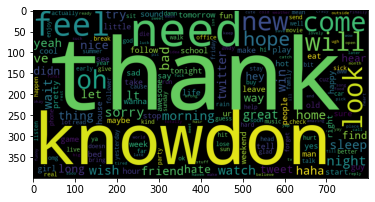

In [294]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(width=800,height=400).generate(''.join(data['tweets']))
plt.imshow(wc)